In [181]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme()

import numpy as np
import pandas as pd

min_val, max_val = 0.5,1.0
n = 10
orig_cmap = sns.palettes.color_palette("Blues", as_cmap=True)
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

min_val, max_val = 0.5,1.0
n = 10
orig_cmap = sns.palettes.color_palette("Reds", as_cmap=True)
colors = orig_cmap(np.linspace(min_val, max_val, n))
red_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

## Naive Training Comparison

In [244]:
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/naive_bilstmm.csv", index_col=0)

In [245]:
column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))
column_name

['L Nov 26 19:18 Bilstm INIT20% Naive - valid_auroc(epoch)',
 'L Nov 26 18:47 Bilstm INIT10% Naive - valid_auroc(epoch)',
 'L Nov 26 18:27 Bilstm INIT5% Naive - valid_auroc(epoch)',
 'L Nov 26 18:16 Bilstm INIT1% Naive - valid_auroc(epoch)',
 'Nov 26 00:40 Bilstm INIT100% Naive - valid_auroc(epoch)',
 'Nov 25 23:19 Bilstm INIT50% Naive - valid_auroc(epoch)',
 'Nov 25 22:43 Bilstm INIT20% Naive - valid_auroc(epoch)',
 'Nov 25 22:22 Bilstm INIT10% Naive - valid_auroc(epoch)',
 'Nov 25 22:08 Bilstm INIT5% Naive - valid_auroc(epoch)',
 'Nov 25 22:01 Bilstm INIT1% Naive - valid_auroc(epoch)']

In [246]:
df_rename = df[:100][column_name].rename(columns={
    c: ("Large" if c.startswith("L") else "Base") + " " + c.split("INIT")[1].split(" ")[0] for c in column_name
})

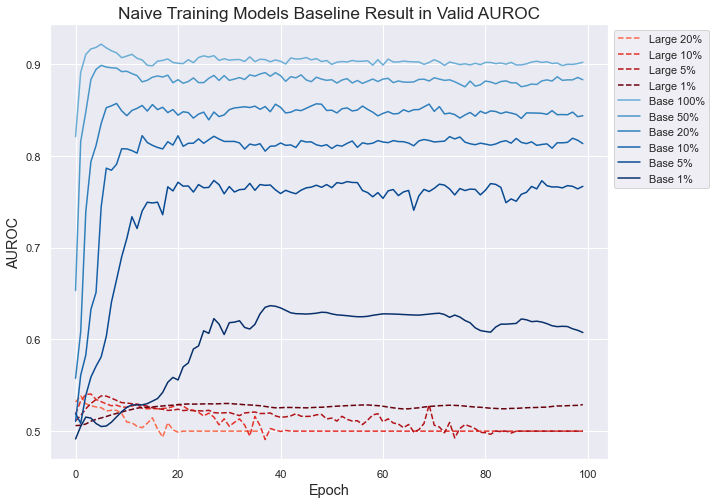

In [247]:
fig, ax = plt.subplots(figsize=(10, 8))

df_rename.loc[:, list(filter(lambda x: x.startswith("Large"), df_rename.columns))].plot(ax=ax, linestyle="--", colormap=red_cmap)
df_rename.loc[:, list(filter(lambda x: x.startswith("Base"), df_rename.columns))].plot(ax=ax, linestyle="-", colormap=blue_cmap)
ax.set_title("Naive Training Models Baseline Result in Valid AUROC", size="x-large")
ax.set_xlabel("Epoch", size="large")
ax.set_ylabel("AUROC", size="large")
# df_rename.plot.line(ax=ax, linestyle="--");
ax.legend(loc='best', bbox_to_anchor=(1., 1.))

## BiLSTM/1dCNN Acq Method Comparison

In [226]:
fname = "bilstm_acqmethod"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))
df_rename = df[:100][column_name].rename(columns={
    c: c.split("Bilstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

In [227]:
fname = "1dcnn_acqmethod"
DIR = "./wandb_csv_results/"
df_1d = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df_1d.columns))

df_1d_rename = df_1d[:100][column_name].rename(columns={
    c: c.split("Cnnlstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

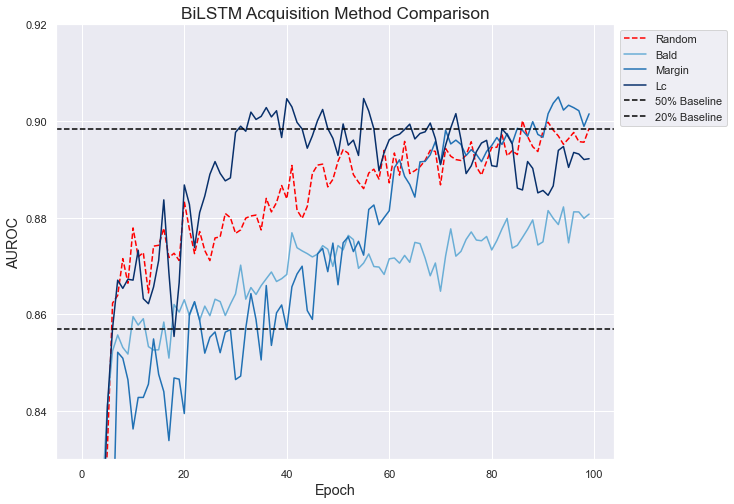

In [228]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylim(0.83, 0.92)
df_rename.loc[:, list(filter(lambda x: x == "Random", df_rename.columns))].plot.line(ax=ax, color="red", linestyle="--");
df_rename.loc[:, list(filter(lambda x: x != "Random", df_rename.columns))].plot.line(ax=ax, colormap=blue_cmap);
ax.axhline(0.898432, color="black", linestyle="--", label="50% Baseline")
ax.axhline(0.856939, color="black", linestyle="--", label="20% Baseline")
ax.set_title("BiLSTM Acquisition Method Comparison", size="x-large")
ax.set_xlabel("Epoch", size="large")
ax.set_ylabel("AUROC", size="large")
ax.legend(loc='best', bbox_to_anchor=(1., 1.))

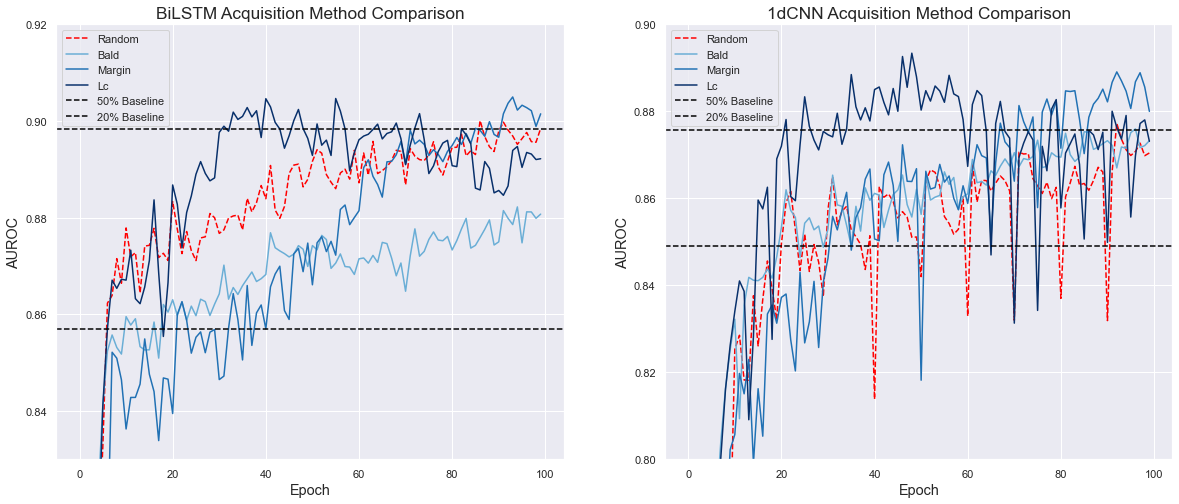

In [231]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

ax[0].set_ylim(0.83, 0.92)
df_rename.loc[:, list(filter(lambda x: x == "Random", df_rename.columns))].plot.line(ax=ax[0], color="red", linestyle="--");
df_rename.loc[:, list(filter(lambda x: x != "Random", df_rename.columns))].plot.line(ax=ax[0], colormap=blue_cmap);
ax[0].axhline(0.898432, color="black", linestyle="--", label="50% Baseline")
ax[0].axhline(0.856939, color="black", linestyle="--", label="20% Baseline")
ax[0].set_title("BiLSTM Acquisition Method Comparison", size="x-large")
ax[0].set_xlabel("Epoch", size="large")
ax[0].set_ylabel("AUROC", size="large")
ax[0].legend()
# ax[0].legend(loc='best', bbox_to_anchor=(1., 1.))

ax[1].set_ylim(0.8, 0.9)
df_1d_rename.loc[:, list(filter(lambda x: x == "Random", df_1d_rename.columns))].plot.line(ax=ax[1], color="red", linestyle="--");
df_1d_rename.loc[:, list(filter(lambda x: x != "Random", df_1d_rename.columns))].plot.line(ax=ax[1], colormap=blue_cmap);
ax[1].axhline(0.8757, color="black", linestyle="--", label="50% Baseline")
ax[1].axhline(0.849, color="black", linestyle="--", label="20% Baseline")
ax[1].set_title("1dCNN Acquisition Method Comparison", size="x-large")
ax[1].set_xlabel("Epoch", size="large")
ax[1].set_ylabel("AUROC", size="large")
ax[1].legend()
# ax[1].legend(loc='best', bbox_to_anchor=(1., 1.))

## Acquisition Period BiLSTM-Margin-5/10, BiLSTM-bald(mc)-acq5/10

In [240]:
fname = "acq_period"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))

df_rename = df[:100][column_name].rename(columns={
    c: c.split("Bilstm")[1].split(" ")[1].lower().capitalize() + acq for c, acq in zip(column_name, [" Acq 10", " Acq 5"]*2)
})

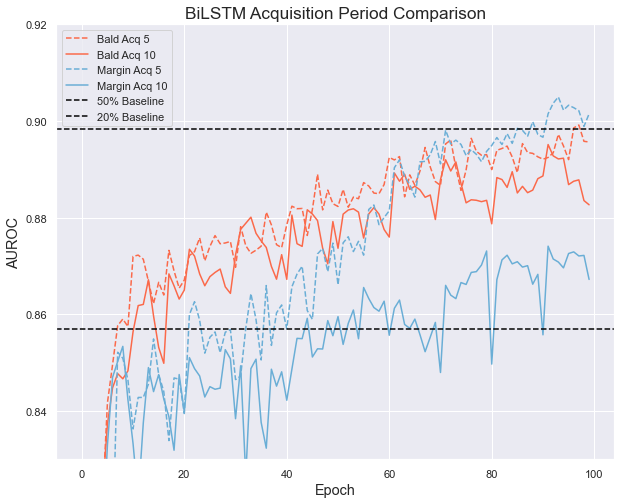

In [242]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylim(0.83, 0.92)
df_rename.loc[:, list(filter(lambda x: x == "Bald Acq 5", df_rename.columns))].plot.line(ax=ax, colormap=red_cmap, linestyle="--");
df_rename.loc[:, list(filter(lambda x: x == "Bald Acq 10", df_rename.columns))].plot.line(ax=ax, colormap=red_cmap);
df_rename.loc[:, list(filter(lambda x: x == "Margin Acq 5", df_rename.columns))].plot.line(ax=ax, colormap=blue_cmap, linestyle="--");
df_rename.loc[:, list(filter(lambda x: x == "Margin Acq 10", df_rename.columns))].plot.line(ax=ax, colormap=blue_cmap,);
ax.axhline(0.898432, color="black", linestyle="--", label="50% Baseline")
ax.axhline(0.856939, color="black", linestyle="--", label="20% Baseline")
ax.set_title("BiLSTM Acquisition Period Comparison", size="x-large")
ax.set_xlabel("Epoch", size="large")
ax.set_ylabel("AUROC", size="large")
ax.legend()
# ax.legend(loc='best', bbox_to_anchor=(1., 1.))

## Acquisition Amount BiLSTM-BALD

In [237]:
fname = "acq_amount"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))

df_rename = df[:100][column_name].rename(columns={
    c: "Increment " +c.split("INC")[1].split(" ")[0] for c in column_name
})

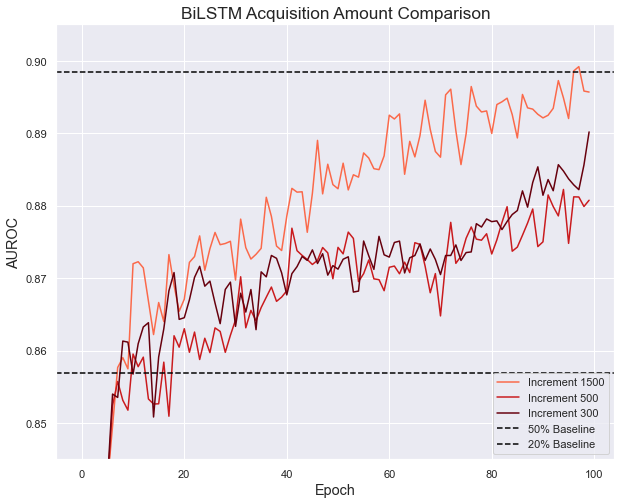

In [238]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylim(0.845, 0.905)
df_rename.plot.line(ax=ax, colormap=red_cmap);
ax.axhline(0.898432, color="black", linestyle="--", label="50% Baseline")
ax.axhline(0.856939, color="black", linestyle="--", label="20% Baseline")
ax.set_title("BiLSTM Acquisition Amount Comparison", size="x-large")
ax.set_xlabel("Epoch", size="large")
ax.set_ylabel("AUROC", size="large")
ax.legend()
# ax.legend(loc='best', bbox_to_anchor=(1., 1.))

## Retrain Comparison

In [234]:
fname = "retrain_bilstm"
DIR = "./wandb_csv_results/"
df = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df.columns))
df_rename = df[:100][column_name].rename(columns={
    c: "BiLSTM " + c.split("Bilstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

In [235]:
fname = "retrain_1dcnn"
DIR = "./wandb_csv_results/"
df_1d = pd.read_csv(f"{DIR}/{fname}.csv", index_col=0)

column_name = list(filter(lambda x: "valid" in x and x.endswith(")"), df_1d.columns))

df_1d_rename = df_1d[:100][column_name].rename(columns={
    c: "1dCNN " + c.split("Cnnlstm")[1].split(" ")[1].lower().capitalize() for c in column_name
})

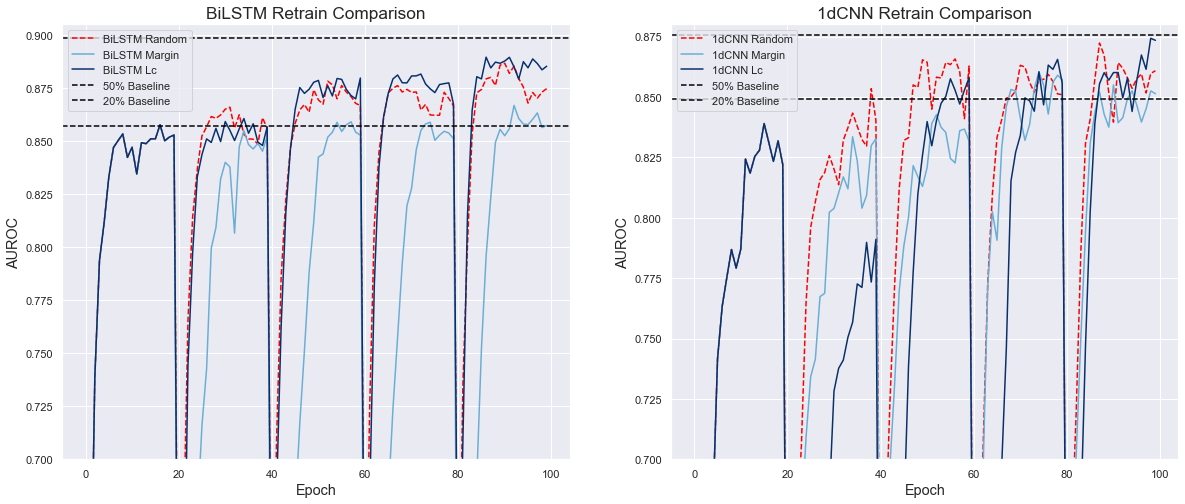

In [236]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

ax[0].set_ylim(0.7, 0.905)
df_rename.loc[:, list(filter(lambda x: x.endswith("Random"), df_rename.columns))].plot.line(ax=ax[0], color="red", linestyle="--");
df_rename.loc[:, list(filter(lambda x: not x.endswith("Random"), df_rename.columns))].plot.line(ax=ax[0], colormap=blue_cmap);
ax[0].axhline(0.898432, color="black", linestyle="--", label="50% Naive")
ax[0].axhline(0.856939, color="black", linestyle="--", label="20% Naive")
ax[0].set_title("BiLSTM Retrain Comparison", size="x-large")
ax[0].set_xlabel("Epoch", size="large")
ax[0].set_ylabel("AUROC", size="large")
ax[0].legend()
# ax[0].legend(loc='best', bbox_to_anchor=(1., 1.))

ax[1].set_ylim(0.7, 0.88)
df_1d_rename.loc[:, list(filter(lambda x: x.endswith("Random"), df_1d_rename.columns))].plot.line(ax=ax[1], color="red", linestyle="--");
df_1d_rename.loc[:, list(filter(lambda x: not x.endswith("Random"), df_1d_rename.columns))].plot.line(ax=ax[1], colormap=blue_cmap);
ax[1].axhline(0.8757, color="black", linestyle="--", label="50% Naive")
ax[1].axhline(0.849, color="black", linestyle="--", label="20% Naive")
ax[1].set_title("1dCNN Retrain Comparison", size="x-large")
ax[1].set_xlabel("Epoch", size="large")
ax[1].set_ylabel("AUROC", size="large")
ax[1].legend()
# ax[1].legend(loc='best', bbox_to_anchor=(1., 1.))